In [6]:
import cv2
import matplotlib.pyplot as plt
import numpy as np


In [7]:
modelFile = "opencv_face_detector_uint8.pb"
configFile = "opencv_face_detector.pbtxt"
net = cv2.dnn.readNetFromTensorflow(modelFile, configFile)

In [216]:
#eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')
#eye_cascade = cv2.CascadeClassifier('haarcascade_mcs_lefteye.xml')
#eye_cascade = cv2.CascadeClassifier('haarcascade_mcs_righteye.xml')
#eye_cascade = cv2.CascadeClassifier('ojoD.xml')
#eye_cascade = cv2.CascadeClassifier('haarcascade_eye_tree_eyeglasses.xml')
eye_cascades = [
    cv2.CascadeClassifier('haarcascade_eye_tree_eyeglasses.xml'),
    cv2.CascadeClassifier('ojoD.xml'),
    cv2.CascadeClassifier('ojoI.xml'),
                #cv2.CascadeClassifier('haarcascade_mcs_lefteye.xml'),
                #cv2.CascadeClassifier('haarcascade_eye.xml'),
                #cv2.CascadeClassifier('haarcascade_mcs_righteye.xml')
              ]

#nose_cascade = cv2.CascadeClassifier('haarcascade_mcs_righteye.xml')
#nose_cascade = cv2.CascadeClassifier('ojoI.xml')
 


limit_eyes = 3
def detect_eye(img,face):
    cxs =[]
    cys =[]
    weights = [1,.8,.6,.4,.3]
    ws =[]
    roi = img
    if face is not None:
        height = face[3]-face[1]
        width  = face[2]-face[0]
        #y0 = face[1]+int(height*3/12)
        y0 = face[1]+int(height*2/12)
        #y1 = face[3]-int(height/2)
        y1 = face[3]-int(height*13/24)
        x0 = face[0]+int(width*3/5)
        x1 = face[2]#-int(width/6)
        
        roi = cv2.cvtColor(img[y0:y1,x0:x1],cv2.COLOR_BGR2GRAY)
        cv2.rectangle(img,(x0,y0),(x1,y1),(0,0,0),3)
        for w,eye_cascade in enumerate(eye_cascades):
            eyes = eye_cascade.detectMultiScale(roi)
            
            max_eyes = len(eyes)
            num_eyes = min(max_eyes,limit_eyes)
            for i, (ex,ey,ew,eh) in enumerate(eyes):
                if i>=limit_eyes:
                    #print('x')
                    break
                    '''
                    cxs.append(ex+ew*0.5)
                    cys.append(ey+eh*0.5)
                    cv2.rectangle(img[y0:y1,x0:x1],
                              (ex,ey),
                              (ex+ew,ey+eh),
                              (0,155,255),3
                                 )
                    '''
                else:
                    cxs.append((ex+ew*0.5)*weights[w]/num_eyes)
                    cys.append((ey+eh*0.5)*weights[w]/num_eyes)
                    ws.append(weights[w]/num_eyes)
                    cv2.rectangle(img[y0:y1,x0:x1],
                              (ex,ey),
                              (ex+ew,ey+eh),
                              (0,0,255),3
                             )
        if len(cxs) >0:
            cx = int(np.sum(cxs)/np.sum(ws[:len(cxs)]))
            cy = int(np.sum(cys)/np.sum(ws[:len(cxs)]))
            cv2.line(img[y0:y1,x0:x1],(0,cy),(x1-x0,cy),(100,100,100),3)
            return(y0+cy)
        else:    
            return (-1)
        '''
        #roi2 = img[face[1]:face[3],face[0]:face[2]]
        #roi2 = cv2.cvtColor(roi2,cv2.COLOR_BGR2HSV)
        nose = nose_cascade.detectMultiScale(roi)
        for i, (nx,ny,nw,nh) in enumerate(nose):
            if i>=2:
                #print('x')
                break
            else:
                cv2.rectangle(img[y0:y1,x0:x1],
                             (nx,ny),
                             (nx+nw,ny+nh),
                             (0,0,0),3
                             )
                
        eye1 = eye_cascade1.detectMultiScale(roi)
        for i, (nx,ny,nw,nh) in enumerate(eye1):
            if i>=2:
                #print('x')
                break
            else:
                cv2.rectangle(img[y0:y1,x0:x1],
                             (nx,ny),
                             (nx+nw,ny+nh),
                             (128,128,0),3
                             )
                             '''
        

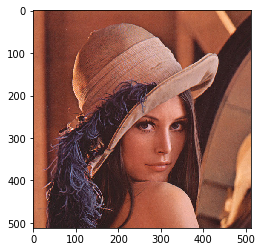

In [3]:
image_ori = cv2.imread('../images/lena.png')
image = image_ori.copy()
plt.imshow(image[:,:,::-1])

In [210]:
def face_detect(img_ori,test):
    image = image_ori.copy()
    blob = cv2.dnn.blobFromImage(image, 
                                 1.0, # scalefactor (1.0=no scaling)
                                 (300, 300), #size
                                 [104, 117, 123], #mean subtraction
                                 True, #swapRB
                                 False #crop
                                )
    conf_threshold = 0.2
    img_width = image.shape[1]
    img_height = image.shape[0]
    #print(img_width,img_height)
    net.setInput(blob)
    detections = net.forward()
    bboxes = []
    
    
    confs = detections[0,0,:,2]
    #print(confs)
    idx = np.argmax(confs, axis=0)
    #print(idx)
    #print(detections[0,0,idx,2].shape)
    confidence = detections[0,0,idx,2]
    x0o = int(detections[0,0,idx,3] * img_width)
    y0 = int(detections[0,0,idx,4] * img_height)
    x1o = int(detections[0,0,idx,5] * img_width)
    
    x0 = max(x0o-int((x1o-x0o)*0.3),0)
    x1 = min(x1o+int((x1o-x0o)*0.3),img_width)
    y1 = int(detections[0,0,idx,6] * img_height)

    #print(confidence,":({},{})({},{})".format(x0,y0,x1,y1))
    cv2.rectangle(image,(x0,y0),(x1,y1),(255,0,0),30)
    cv2.putText(image,'{:.2f}'.format(confidence), 
                (x0,y0),
                cv2.FONT_HERSHEY_SIMPLEX,
                1, (255,0,0), 5
               )
    #plt.figure(figsize=(10,10))
    #plt.imshow(image[:,:,::-1])
    cy = detect_eye(image,(x0,y0,x1,y1))
    if cy == -1:
        cv2.imwrite(test,image)
    else:
        black_height = int((y1-y0)/10)
        cv2.rectangle(image,(x0,cy-black_height),(x1,cy+black_height),(0,0,0),-1)
        cv2.imwrite(test,image)

    '''
    max_c=0.
    for i in range(detections.shape[2]):
        confidence = detections[0, 0, i, 2]
        if confidence > max_c:
            max_c = confidence
        if confidence > conf_threshold:
            x0 = int(detections[0, 0, i, 3] * img_width)
            y0 = int(detections[0, 0, i, 4] * img_height)
            x1 = int(detections[0, 0, i, 5] * img_width)
            y1 = int(detections[0, 0, i, 6] * img_height)

            print(confidence,":({},{})({},{})".format(x0,y0,x1,y1))
            cv2.rectangle(image,(x0,y0),(x1,y1),(255,0,0),3)
            cv2.putText(image,'{:.2f}'.format(confidence), 
                        (x0,y0),
                        cv2.FONT_HERSHEY_SIMPLEX,
                        1, (255,0,0), 2
                       )

    print(max_c)
    #plt.imshow(image[:,:,::-1])
    cv2.imwrite(test,image)
    '''

In [3]:
?cv2.dnn.blobFromImage

Object `cv2.dnn.blobFromImage` not found.


In [4]:
cv2.rectangle?

Object `cv2.rectangle` not found.


In [217]:
import os

path_dir = '../side/'
path_dir2 = '../side1/'

file_list = os.listdir(path_dir)

for item in file_list:
    if item.find('.JPG') is not -1:
        print(item)
        image_ori = cv2.imread(path_dir+item)
        face_detect(image_ori,(path_dir2+item))

IMG_6466.JPG
IMG_6469.JPG
IMG_6472.JPG
IMG_6559.JPG
IMG_6584.JPG
IMG_6587.JPG
IMG_6639.JPG
IMG_6642.JPG
IMG_6648.JPG
IMG_6657.JPG
IMG_6660.JPG
IMG_6663.JPG
IMG_6666.JPG
IMG_6669.JPG
IMG_6672.JPG
IMG_6675.JPG
IMG_6684.JPG
IMG_6687.JPG
IMG_6690.JPG
IMG_6693.JPG
IMG_6696.JPG
IMG_6699.JPG
IMG_6702.JPG
IMG_6705.JPG
IMG_6708.JPG
IMG_6711.JPG
IMG_6714.JPG
IMG_6717.JPG
IMG_6720.JPG
IMG_6723.JPG
IMG_6726.JPG
IMG_6729.JPG
IMG_6732.JPG
IMG_6735.JPG
IMG_6738.JPG
IMG_6741.JPG
IMG_6744.JPG
IMG_6747.JPG
IMG_6750.JPG
IMG_6753.JPG
IMG_6756.JPG
IMG_6759.JPG
IMG_6762.JPG
IMG_6765.JPG
IMG_6768.JPG
IMG_6771.JPG
IMG_6773.JPG
IMG_6777.JPG
IMG_6780.JPG
IMG_6783.JPG
IMG_6786.JPG
IMG_6789.JPG
IMG_6792.JPG
IMG_6795.JPG


In [66]:
path_dir = '../side/'
path_dir2 = '../side1/'
fstr = 'IMG_6723.JPG'
image_ori = cv2.imread(path_dir+fstr)
face_detect(image_ori,path_dir2+fstr)